2988.7243029685797
Score R2 sur l'ensemble de test : 0.8876714376600005


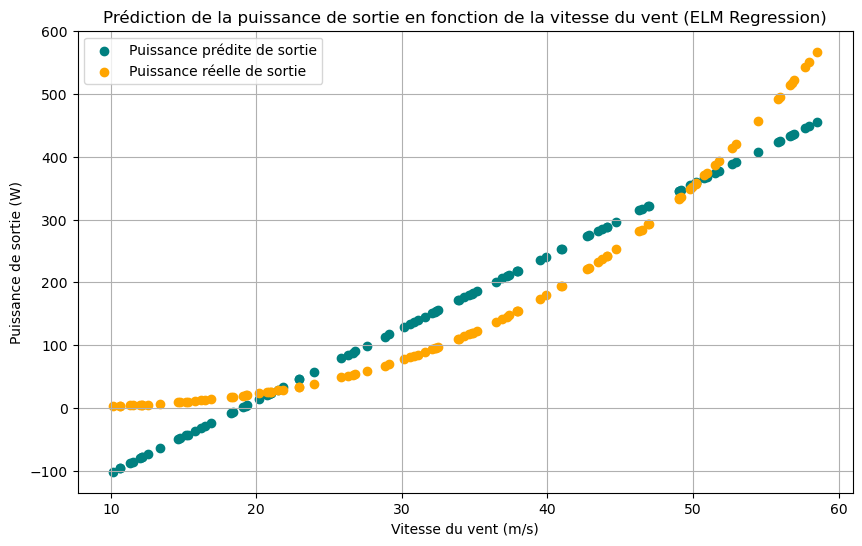

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import random
from sklearn.metrics import r2_score

def read_data_from_file(file_path, num_entries):
    data = []  # Crée une liste pour stocker les valeurs de vitesse du vent
    with open(file_path, 'r') as file:
        lines = file.readlines()
        selected_lines = random.sample(lines, num_entries)
        for line in selected_lines:
            line = line.strip()
            if line:
                d = float(line)  # Convertit la ligne en nombre flottant
                data.append(d)  # Ajoute la valeur de vitesse du vent à la liste
    return np.array(data)  # Convertit la liste en tableau NumPy et la retourne



file_path = r"C:\Users\LENOVO\Documents\Reseaux de neurones\windSpeed.txt"
num_entries = 2000  # Nombre d'entrées à utiliser
wind_speed_data = read_data_from_file(file_path,num_entries)  # Appelle la fonction pour lire les données de vitesse du vent

wind_speed_data

def calculate_wind_power(wind_speed):
    C = 0.0003
    S = 3
    return C * np.pi * S * (wind_speed ** 3)

wind_power_data = calculate_wind_power(wind_speed_data)
wind_power_data = np.array(wind_power_data)
wind_power_data

X_train, X_test, y_train, y_test = train_test_split(wind_speed_data.reshape(-1, 1), wind_power_data, test_size=100)

def elm(X, T, L):
    
    N, n = X.shape
    
    
    w = np.random.uniform(-1, 1, size=(L, n))
    b = np.random.uniform(-1, 1, size=(L, 1))
    
    
    H = np.zeros((N, L))
    for i in range(N):
        H[i] = np.maximum(0, np.dot(X[i], w.T) + b.T)
    
    beta = np.dot(np.linalg.pinv(H), T.reshape(-1, 1))
    
    return w, b, beta



def predict_elm(X,w, b, beta):
    
    N, _ = X.shape
    
    
    H = np.maximum(0, np.dot(X, w.T) + b.T)
    y_pred = np.dot(H, beta).flatten()
    
    return y_pred

def train_and_predict_elm(file_path, L):
    
    wind_speed_data = read_data_from_file(file_path,num_entries)
    wind_power_data = calculate_wind_power(wind_speed_data)
    wind_power_data = np.array(wind_power_data)
    wind_power_data

    
    w, b, beta = elm(X_train, y_train, L)
    y_pred_test = predict_elm(X_test, w, b, beta)
    
    return y_pred_test


path = r"C:\Users\LENOVO\Documents\Reseaux de neurones\windSpeed.txt"
y_pred = train_and_predict_elm(path, 2)

squared_errors = (y_pred - y_test)**2

mse = np.mean(squared_errors)
print (mse)

# Calculer le score R2
r2 = r2_score(y_test, y_pred)
print("Score R2 sur l'ensemble de test :", r2)

# Affichage des résultats
fig, ax = plt.subplots(figsize=(10, 6))

# Affichage de la vitesse du vent en fonction de la puissance de sortie prédite
ax.scatter(X_test, y_pred, color='teal', label='Puissance prédite de sortie')
# Affichage de la vitesse du vent en fonction de la puissance de sortie réelle
ax.scatter(X_test, y_test, color='orange', label='Puissance réelle de sortie')

ax.set_xlabel('Vitesse du vent (m/s)')
ax.set_ylabel('Puissance de sortie (W)')
ax.set_title('Prédiction de la puissance de sortie en fonction de la vitesse du vent (ELM Regression)')
ax.legend()
ax.grid(True)

plt.show()




Score du modèle MLP sur l'ensemble de test : 0.9997082429771209
Mean Squared Error (MSE) : 8.942751716346379


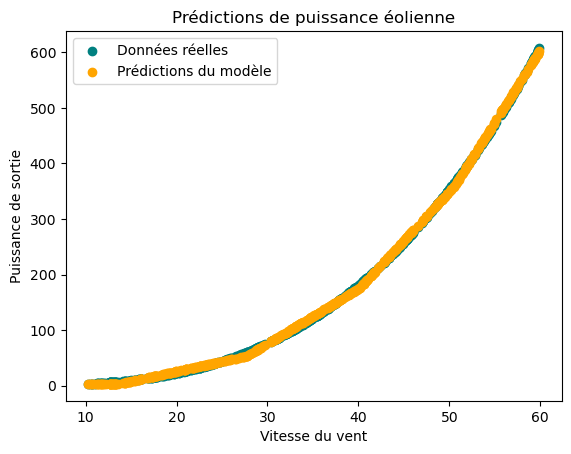

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fonction pour calculer la puissance de sortie de l'éolienne
def calculate_power(v, c=0.0003, s=3):
    return c * np.pi * s * v**3

# Charger les données de vitesse de vent
wind_speed_data = np.loadtxt("windSpeed.txt")

# Créer les données d'entrée et de sortie en utilisant l'équation donnée
X = wind_speed_data.reshape(-1, 1) # Vitesse du vent
y = calculate_power(wind_speed_data) # Puissance de sortie

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Créer et entraîner le régresseur MLP
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10,), max_iter=2000, random_state=42)
mlp_regressor.fit(X_train, y_train)

# Évaluer le modèle sur l'ensemble de test
score = mlp_regressor.score(X_test, y_test)
print("Score du modèle MLP sur l'ensemble de test :", score)

# Prédire sur l'ensemble de test
y_pred = mlp_regressor.predict(X_test)

# Calculer le MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) :", mse)

# Visualisation des prédictions
plt.scatter(X_test, y_test, color='teal', label='Données réelles')
plt.scatter(X_test, mlp_regressor.predict(X_test), color='orange', label='Prédictions du modèle')
plt.xlabel('Vitesse du vent')
plt.ylabel('Puissance de sortie')
plt.title('Prédictions de puissance éolienne')
plt.legend()
plt.show()